## Création de datasets

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
BASE_DIR = '../../../Data/'

critic_reviews_filename = BASE_DIR + 'rotten/rotten_tomatoes_critic_reviews.csv'
movies_filename = BASE_DIR + 'rotten/rotten_tomatoes_movies.csv'

critic_reviews_df = pd.read_csv(critic_reviews_filename)
movies_df = pd.read_csv(movies_filename)

In [3]:
critic_reviews_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [4]:
movies_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [5]:
critic_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [7]:
FEATURES_NAMES = {'movie_title': 'title' , 'movie_info': 'info', 'critics_consensus': 'critic',
                  'content_rating': 'rating', 'genres': 'genres', 'directors': 'directors',
                  'authors': 'authors', 'actors': 'actors', 'production_company': 'production_company', 
                  'audience_status': 'audience_status', 'audience_rating': 'audience_rating','audience_count': 'audience_count'}

In [8]:
def movie2inputformat1(movie):
    input_ = '<movie> '
    
    for att in FEATURES_NAMES.keys():
        input_ += '<' + FEATURES_NAMES[att] + '> '
        input_ += str(movie[att])
        input_ += ' </' + FEATURES_NAMES[att] + '> '
    
    input_ += '</movie>'
    return input_

In [9]:
def movie2inputformat2(movie):
    input_ = ''
    
    for att in FEATURES_NAMES.keys():
        input_ += FEATURES_NAMES[att] + ' : '
        input_ += str(movie[att])
        input_ += ' | '
    
    return input_

In [10]:
def movie2inputformat3(movie):
    input_ = dict()
    
    for att in FEATURES_NAMES.keys():
        input_[FEATURES_NAMES[att]] = str(movie[att])
    
    return input_

In [11]:
movies_input_df = pd.DataFrame()
movies_input_df['movieID'] = movies_df['rotten_tomatoes_link']
movies_input_df['input1'] = movies_df.apply(movie2inputformat1, axis=1)
movies_input_df['input2'] = movies_df.apply(movie2inputformat2, axis=1)
movies_input_df['input3'] = movies_df.apply(movie2inputformat3, axis=1)
movies_input_df.head()

,movieID,input1,input2,input3
0,m/0814255,<movie> <title> Percy Jackson & the Olympians:...,title : Percy Jackson & the Olympians: The Lig...,{'title': 'Percy Jackson & the Olympians: The ...
1,m/0878835,<movie> <title> Please Give </title> <info> Ka...,title : Please Give | info : Kate (Catherine K...,"{'title': 'Please Give', 'info': 'Kate (Cather..."
2,m/10,<movie> <title> 10 </title> <info> A successfu...,"title : 10 | info : A successful, middle-aged ...","{'title': '10', 'info': 'A successful, middle-..."
3,m/1000013-12_angry_men,<movie> <title> 12 Angry Men (Twelve Angry Men...,title : 12 Angry Men (Twelve Angry Men) | info...,"{'title': '12 Angry Men (Twelve Angry Men)', '..."
4,m/1000079-20000_leagues_under_the_sea,"<movie> <title> 20,000 Leagues Under The Sea <...","title : 20,000 Leagues Under The Sea | info : ...","{'title': '20,000 Leagues Under The Sea', 'inf..."


In [12]:
def to_userID(username):
    return 'u/' + '_'.join(str(username).split())

In [13]:
CINEMA_NOTATION_DICT = {'A+': 5, 'A': 4, 'A-': 3.7, 'B+': 3.3, 'B': 3,
        'B-': 2.7, 'C+': 2.3, 'C': 2, 'C-': 1.7, 'D+': 1.3, 'D': 1, 'D-': 0.7, 'F': 0}

def cinema_score(notation):
    return CINEMA_NOTATION_DICT.get(notationtion, None)

def to_rating(s):
    try: 
        nd = s.split('/')
        if len(nd) == 2:
            n, d = nd
            n = float(n)
            d = float(d)
            v = 5*n/d
            if v > 5:
                return None
            return v
        if s[0].upper() in 'ABCDF':
            return cinema_score(s.strip())
        return None
    except: 
        #print(s)
        return None

In [14]:
users_output_df = pd.DataFrame()
users_output_df['movieID'] = critic_reviews_df['rotten_tomatoes_link']
users_output_df['userID'] = critic_reviews_df['critic_name'].apply(to_userID)
users_output_df['rating'] = critic_reviews_df['review_score'].apply(to_rating)
users_output_df['target'] = critic_reviews_df['review_content']

In [15]:
users_output_df.head()

,movieID,userID,rating,target
0,m/0814255,u/Andrew_L._Urban,NaN,A fantasy adventure that fuses Greek mythology...
1,m/0814255,u/Louise_Keller,NaN,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,u/nan,NaN,With a top-notch cast and dazzling special eff...
3,m/0814255,u/Ben_McEachen,3.5,Whether audiences will get behind The Lightnin...
4,m/0814255,u/Ethan_Alter,NaN,What's really lacking in The Lightning Thief i...


In [16]:
len(users_output_df), len(movies_input_df)

(1130017, 17712)

In [17]:
#users_output_df.to_csv('../../../Data/appdata/rotten/users_output.csv', index=True)

In [ ]:
users_output_df = pd.read_csv('../../../Data/appdata/rotten/users_output.csv', index_col=0)
users_output_df.head(5)

In [18]:
#movies_input_df.to_csv('../../../Data/appdata/rotten/movies_input.csv', index=True)

In [ ]:
movies_input_df = pd.read_csv('../../../Data/appdata/rotten/movies_input.csv', index_col=0)
movies_input_df.head(5)

In [45]:
def discretise(n, s=2):
        if s == 2:
            return 'positive' if n > 2.5 else 'negative'
        if s == 3:
            if n < 2: return 'negative'
            if n < 4: return 'neutral'
            return 'positive'
        if s == 4:
            if n < 1.25: return 'very negative'
            if n < 2.50: return 'negative'
            if n < 3.75: return 'positive'
            return 'very positive'
        if s == 5:
            if n < 1: return 'very negative'
            if n < 2: return 'negative'
            if n < 3: return 'neutral'
            if n < 4: return 'positive'
            return 'very positive'
        return math.floor(n)

In [ ]:
def build_movie_n_reviews_to_review_dataset(nb_example_per_user=10):
    users_output_filtered_df = users_output_df[['movieID', 'userID', 'target']]
    users_output_filtered_df.dropna(inplace=True)

    occurrences = users_output_filtered_df['userID'].value_counts()
    mask = users_output_filtered_df['userID'].isin(occurrences[occurrences >= 30].index)
    users_output_filtered_df = users_output_filtered_df[mask]

    data_users_df = users_output_filtered_df.merge(movies_input_df, on='movieID')
    data_users_df = data_users_df[['movieID', 'userID', 'input1', 'target']]
    inputs  = []
    outputs = []
    
    for i, v in enumerate(data_users_df.iterrows()):
        dataID, userID, data, out_ = v
        user_examples_df = (data_users_df[data_users_df['userID']==userID]).sample(n=nb_example_per_user+1)
        user_examples_df = user_examples_df[user_examples_df['movieID']!=dataID]
        user_corpus = list(user_examples_df['target'])[:nb_example_per_user] 
        in_ = 'summarize: ' + ' ' + data + ' ||| '.join(user_corpus)
        inputs.append(in_)
        outputs.append(out_)
        
    df = pd.DataFrame()
    df['input'] = inputs
    df['output'] = outputs
    return df

In [ ]:
def build_movie_review_to_rating_dataset():
    users_output_filtered_df = users_output_df[['movieID', 'userID', 'target', 'rating']]
    users_output_filtered_df.dropna(inplace=True)

    data_users_df = users_output_filtered_df.merge(movies_input_df, on='movieID')
    data_users_df = data_users_df[['movieID', 'userID', 'input1', 'target', 'rating']]
    
    def to_input(row):
        return row['input1'] + ' ||| ' + row['target']
    
    df = pd.DataFrame()
    df['input'] = data_users_df.apply(to_input, axis=1)
    df['output'] = data_users_df['rating'].apply(str)
    return df

In [22]:
def build_review_to_rating_dataset():
    users_output_filtered_df = users_output_df[['target', 'rating']]
    users_output_filtered_df.dropna(inplace=True)

    df = pd.DataFrame()
    df['input'] = users_output_filtered_df['target']
    df['output'] = users_output_filtered_df['rating']
    return df

In [23]:
df = build_review_to_rating_dataset()
df.head(5)

/var/folders/94/mh6g2gbj3bl342zd3jjfff0c0000gn/T/ipykernel_74275/2696168264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_output_filtered_df.dropna(inplace=True)


,input,output
3,Whether audiences will get behind The Lightnin...,3.50
6,Harry Potter knockoffs don't come more transpa...,1.25
7,"Percy Jackson isn't a great movie, but it's a ...",3.50
9,"Crammed with dragons, set-destroying fights an...",3.00
10,"This action-packed fantasy adventure, based on...",4.00


In [24]:
df.to_csv('../../../Data/appdata/rotten/review_to_rating.csv', index=True)

In [46]:
df = pd.read_csv('../../../Data/appdata/rotten/review_to_rating.csv', index_col=0)

In [49]:
rating2 = df.output.apply(lambda x: discretise(x, 2))
rating2.value_counts()

positive    432128
negative    202042
Name: output, dtype: int64

In [50]:
rating2 = df.output.apply(lambda x: discretise(x, 3))
rating2.value_counts()

neutral     378224
positive    182595
negative     73351
Name: output, dtype: int64

In [51]:
rating2 = df.output.apply(lambda x: discretise(x, 4))
rating2.value_counts()

very positive    255317
positive         249308
negative         101716
very negative     27829
Name: output, dtype: int64

In [55]:
rating2 = df.output.apply(lambda x: discretise(x, 5))
rating2.value_counts()

positive         247599
very positive    182595
neutral          130625
negative          64169
very negative      9182
Name: output, dtype: int64

In [36]:
def build_n_review_n_1_rating_user_to_rating_dataset(n):
    users_output_filtered_df = users_output_df[['userID', 'target', 'rating']]
    users_output_filtered_df.dropna(inplace=True)

    occurrences = users_output_filtered_df['userID'].value_counts()
    mask = users_output_filtered_df['userID'].isin(occurrences[occurrences >= n+10].index)
    users_output_filtered_df = users_output_filtered_df[mask]

    inputs  = []
    outputs = []
    
    for i, v in enumerate(users_output_filtered_df.iterrows()):
        _, (userID, target, rating) = v

        user_examples_df = users_output_filtered_df[users_output_filtered_df['target']!=target]
        user_examples_df = (user_examples_df[user_examples_df['userID']==userID]).sample(n=n)
        user_examples_df = user_examples_df[['target', 'rating']]

        user_examples_input_list = user_examples_df.apply(
            lambda row: f"<review>{row['target']}</review> <rating>{row['rating']}</rating>", axis=1
        ).tolist()
        user_examples_input_list.append(f"<review>{target}</review>")

        user_examples_input = ' ||| '.join(user_examples_input_list)
        inputs.append(user_examples_input)
        outputs.append(rating)
        
    df = pd.DataFrame()
    df['input'] = inputs
    df['output'] = outputs
    return df

In [37]:
df = build_n_review_n_1_rating_user_to_rating_dataset(2)
df.head(5)

/var/folders/94/mh6g2gbj3bl342zd3jjfff0c0000gn/T/ipykernel_74275/1832965947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_output_filtered_df.dropna(inplace=True)


,input,output
0,<review>Character depth and stirring subtext i...,3.50
1,<review>A textbook example of a director prizi...,1.25
2,<review>There is a fine line between silly dum...,3.50
3,<review>Those who loved the comedy stylings of...,3.00
4,<review>The best zom-com since Shaun of the De...,4.00


In [38]:
df.to_csv('../../../Data/appdata/rotten/2_review_1_rating_user_to_rating_dataset.csv', index=True)

<AxesSubplot:>

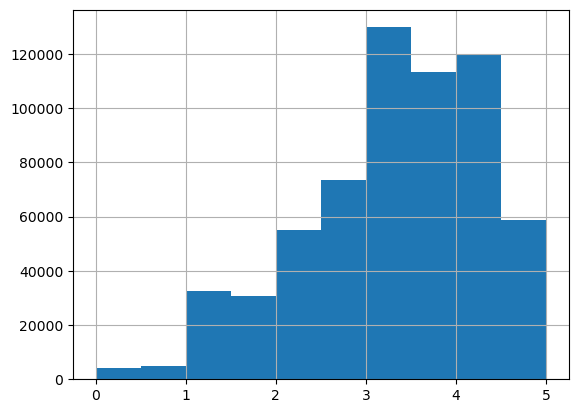

In [40]:
df.output.hist()

<AxesSubplot:>

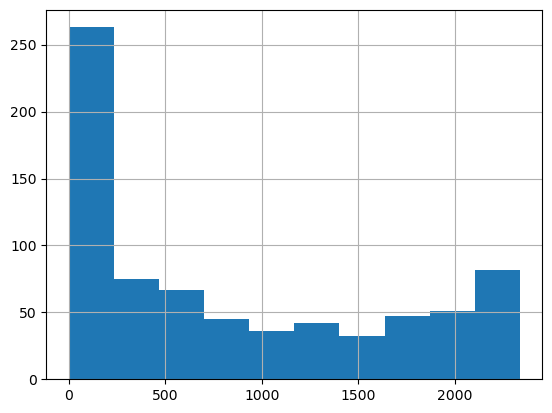

In [41]:
df.input.str.len().value_counts().hist()

In [42]:
df.input[0]

"<review>Character depth and stirring subtext is what books are for. Adamson's Narnia adaptations remove all that pesky claptrap so that we can glide through a superficial reading.</review> <rating>3.0</rating> ||| <review>It must try all manner of bizarre/obscene/silly things to sustain itself beyond stating the obvious about celebrity excess.</review> <rating>2.0</rating> ||| <review>Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- but will the consuming shadow of Potter be too big to break free of?</review>"

In [ ]:
df = build_n_review_n_1_rating_user_to_rating_dataset(5)
df.head(5)

In [ ]:
df.to_csv('../../../Data/appdata/rotten/5_review_4_rating_user_to_rating_dataset.csv', index=True)

In [ ]:
df = build_n_review_n_1_rating_user_to_rating_dataset(10)
df.head(5)

In [ ]:
df.to_csv('../../../Data/appdata/rotten/10_review_9_rating_user_to_rating_dataset.csv', index=True)